## Enquête : les étudiants et la ville

Nous considérons une partie des données issues de l'enquête "Les étudiants et la ville" effectuée en 2001 par des étudiants de sociologie à l'Université de Tours. Cet exemple est décrit dans : Crucianu M., Asselin de Beauville J-P., Boné
R., Méthodes factorielles pour l'analyse des données, Hermès-Lavoisier 2004.

__L'analyse porte sur cinq questions en rapport avec le logement étudiant. L'ensemble des individus statistiques est ici un échantillon de 383 étudiants.__

In [12]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [13]:
df = pd.read_excel('../MT15_exam_acm.xls')
df.index = [f'Salarié {i+1}' for i in range(len(df.index))]


In [14]:
X = df.values
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values)
my_mca.fit(X)


MCA(row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27', 'Salarié 28', '...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

In [15]:
 print(my_mca.eig_)

[[  0.37787717   0.34730269   0.32269661   0.29730798   0.25
    0.25         0.25         0.25         0.25         0.21544703
    0.17508636   0.15387333   0.11040882]
 [ 11.62698977  10.68623674   9.9291266    9.14793789   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.62913945
    5.38727259   4.734564     3.39719451]
 [ 11.62698977  22.31322651  32.24235311  41.390291    49.08259869
   56.77490638  64.46721407  72.15952176  79.85182946  86.48096891
   91.8682415   96.60280549 100.        ]]


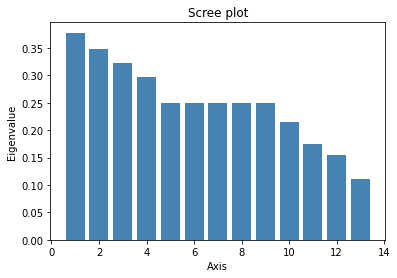

In [16]:
my_mca.plot_eigenvalues()

On a 13 axes retournées par l'ACM .
En effet on a 17 modalités et 4 variables ce qui fait 17-4=13 axes possibles .

In [17]:
#Un seuil de sélection possible : on sélectionne les facteurs dont les v.p. sont supérieures à la moyenne des v.p.
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))



La moyenne des valeurs propres : 
 0.25000000000000006


In [18]:
#On garde donc les 4 premieres facteurs car leurs valeurs propres est supérieures ou égale à 0.25


In [19]:
#Instanciation
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values,n_components=4)
#Calcul
my_mca.fit(X)

MCA(n_components=4,
    row_labels=array(['Salarié 1', 'Salarié 2', 'Salarié 3', 'Salarié 4', 'Salarié 5',
       'Salarié 6', 'Salarié 7', 'Salarié 8', 'Salarié 9', 'Salarié 10',
       'Salarié 11', 'Salarié 12', 'Salarié 13', 'Salarié 14',
       'Salarié 15', 'Salarié 16', 'Salarié 17', 'Salarié 18',
       'Salarié 19', 'Salarié 20', 'Salarié 21', 'Salarié 22',
       'Salarié 23', 'Salarié 24', 'Salarié 25', 'Salarié 26',
       'Salarié 27...
       'Salarié 51', 'Salarié 52', 'Salarié 53', 'Salarié 54',
       'Salarié 55', 'Salarié 56', 'Salarié 57', 'Salarié 58',
       'Salarié 59', 'Salarié 60', 'Salarié 61', 'Salarié 62',
       'Salarié 63', 'Salarié 64', 'Salarié 65', 'Salarié 66',
       'Salarié 67', 'Salarié 68', 'Salarié 69', 'Salarié 70',
       'Salarié 71', 'Salarié 72', 'Salarié 73', 'Salarié 74'],
      dtype=object),
    var_labels=array(['Work_accident', 'left', 'sales', 'salary'], dtype=object))

# Analyse des points lignes : 


In [21]:
df_rows = my_mca.row_topandas()


In [22]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[ 0.37404621  0.71027735 -0.23627712 -0.22618361]
 [ 0.00616611 -1.06811784  0.18145969 -0.26365012]
 [ 0.60302794  0.12539916  0.33926352  0.8762298 ]
 [-0.45848768 -1.3385793   0.75417176  0.34817181]
 [-0.22673892 -0.28757212 -0.49888933 -0.06686775]
 [-0.03043263 -0.25634572 -0.5505052  -0.23688186]
 [ 0.2024724  -1.03689144  0.12984382 -0.43366423]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [-0.39798141 -0.56755872 -1.02631206 -1.07894343]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [ 0.72136869  0.53448007  0.68584615 -0.14240411]
 [-0.77214878 -0.07614524  0.02624216 -0.40958134]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [-0.03043263 -0.25634572 -0.5505052  -0.23688186]
 [-0.03043263 -0.25634572 -0.5505052  -0.23688186]
 [ 0.490848    0.13828184 -0.41469719  0.05562289]
 [ 0.2945417   0.10705544 -0.36308132  0.225637  ]
 [-0.82449209  0.51602345 -0.14035506  0.04803699]
 [ 0.95427372 -0.24606565  1.36619518 -0.33918648]
 [-1.3686504  -0.35765992  0.30

In [23]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[5.00343368e-01 1.96298082e+00 2.33785299e-01 2.32532676e-01]
 [1.35968905e-04 4.43913620e+00 1.37890454e-01 3.15949485e-01]
 [1.30044652e+00 6.11856252e-02 4.82001292e-01 3.48977760e+00]
 [7.51749203e-01 6.97185490e+00 2.38184995e+00 5.50996619e-01]
 [1.83852608e-01 3.21776025e-01 1.04227497e+00 2.03233408e-02]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [1.46605178e-01 4.18337416e+00 7.06019083e-02 8.54808663e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [5.66426019e-01 1.25337701e+00 4.41095606e+00 5.29125951e+00]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [1.86093928e+00 1.11153505e+00 1.96982338e+00 9.21736447e-02]
 [2.13215910e+00 2.25603425e-02 2.88385261e-03 7.62503861e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.40627020e-02]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [3.31204699e-03 2.55689128e-01 1.26910258e+00 2.55049995e-01]
 [8.61611871e-01 7.44029935e-02 7.20171704e-01 1.406270

In [24]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[6.33508670e-02 2.28432543e-01 2.52781550e-02 2.31645742e-02]
 [1.14453827e-05 3.43436691e-01 9.91216860e-03 2.09249433e-02]
 [1.30067288e-01 5.62448148e-03 4.11687375e-02 2.74618161e-01]
 [3.35525783e-02 2.85995212e-01 9.07843688e-02 1.93489665e-02]
 [2.91939221e-02 4.69606213e-02 1.41334673e-01 2.53906412e-03]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [1.67705465e-02 4.39827232e-01 6.89696627e-03 7.69347836e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [8.52508948e-03 1.73378394e-02 5.66933658e-02 6.26571636e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [1.86126320e-01 1.02177731e-01 1.68246730e-01 7.25334384e-03]
 [2.49286241e-01 2.42427504e-03 2.87935704e-04 7.01417610e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.23192472e-03]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [1.04823103e-03 7.43755658e-02 3.43005439e-01 6.35099479e-02]
 [2.51679719e-01 1.99748928e-02 1.79645506e-01 3.231924

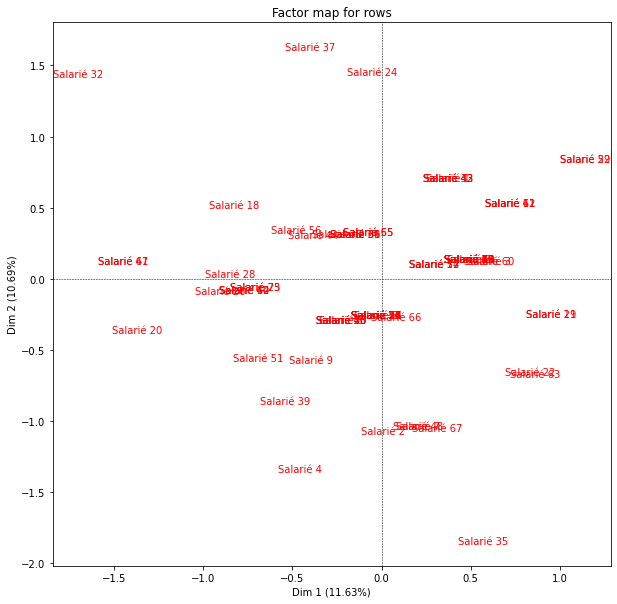

In [25]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

En regardant le graphique , on remarque qu'il y'a des salariés qui ont des comportements similaires . Il s'agit des individus qui sont proches l'un de l'autre . Par exemple , les Salariés 28 29 et 26 ont des comportements similaires . De même pour les salariés 67 et 48 par exemple .

In [26]:
 df_cols = my_mca.col_topandas()
(df_cols)

col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Work_accident_Accident           0.495293       -1.591332        1.337018   
Work_accident_No accident       -0.077390        0.248646       -0.208909   
left_left                       -1.372737        0.389361        0.434048   
left_stay                        0.292551       -0.082979       -0.092502   
sales_IT                        -0.030868        1.118916       -0.320113   
sales_RandD                      1.165297       -2.131744        1.382112   
sales_accounting                 1.858421        1.427036       -0.745457   
sales_hr                        -0.647422       -0.963067       -1.806684   
sales_management                 0.823152        0.704510        1.775187   
sales_marketing                  0.532168       -0.259815        0.987662   
sales_product_mng               -1.368882       -0.940614        0.693103   
sales_sales                      0.256332       -0.229446       -0.725529   
sales_support                   -0.226359       -0.303056       -0.608245   
sales_technical                 -1.567450        0.195339        0.584988   
salary_high                     -1.169723        2.559116        1.905612   
salary_low                      -0.546323       -0.540503       -0.223948   
salary_medium                    0.735438        0.389751        0.084642   

                           col_coord_dim4  col_contrib_dim1  col_contrib_dim2  \
Work_accident_Accident          -0.371191          2.193222         24.633237   
Work_accident_No accident        0.057999          0.342691          3.848943   
left_left                        1.018906         21.901595          1.917119   
left_stay                       -0.217144          4.667553          0.408566   
sales_IT                        -0.756833          0.007667         10.960686   
sales_RandD                     -1.427135          2.428070          8.840979   
sales_accounting                 1.392564          6.175554          3.961865   
sales_hr                        -1.978770          0.374742          0.902222   
sales_management                -0.574106          4.240489          3.379656   
sales_marketing                  1.647573          1.772364          0.459648   
sales_product_mng                1.563012          6.701153          3.442571   
sales_sales                     -0.142202          1.351113          1.177851   
sales_support                    0.228605          0.503903          0.982742   
sales_technical                 -0.518866         17.572568          0.296941   
salary_high                     -1.922140          3.669824         19.111784   
salary_low                      -0.215301         10.140050         10.798917   
salary_medium                    0.422663         15.957441          4.876271   

                           col_contrib_dim3  col_contrib_dim4  col_cos2_dim1  \
Work_accident_Accident            18.714935          1.565659       0.038331   
Work_accident_No accident          2.924209          0.244634       0.038331   
left_left                          2.564086         15.336037       0.401595   
left_stay                          0.546445          3.268336       0.401595   
sales_IT                           0.965526          5.857926       0.000132   
sales_RandD                        3.999727          4.628728       0.037720   
sales_accounting                   1.163560          4.407191       0.095937   
sales_hr                           3.417262          4.449308       0.005742   
sales_management                  23.094040          2.621709       0.070792   
sales_marketing                    7.148728         21.591817       0.029588   
sales_product_mng                  2.011731         11.104182       0.107076   
sales_sales                       12.675107          0.528494       0.029632   
sales_support                      4.260528          0.653232       0.008946   
sales_technical                    2.866144          2.447385

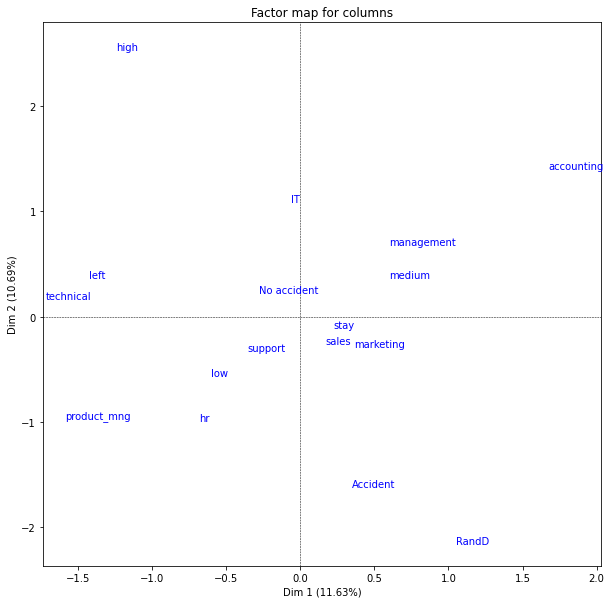

In [27]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))

Les modalités proches les une des autres . Par exemple les salariés qui sont en management auront tendance à avoir un salaire medium . 
Les salariés qui sont en marketing et en sales auront tendance à rester dans leurs metiers .



Par rapport à l'analyse des points colonnes , on remarque IT et No accident ,stay ,salesmarketing par exemple ne sont  pas bien représenté dans l'axe 2 et 1 mais sont représentés plus correctement dans l'axe 3 . on peut en tirer une meilleur analyse 


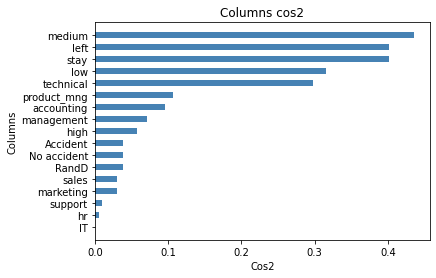

In [28]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_cos2(num_axis=1)

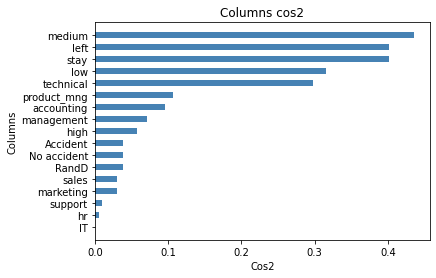

In [29]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_cos2(num_axis=1)

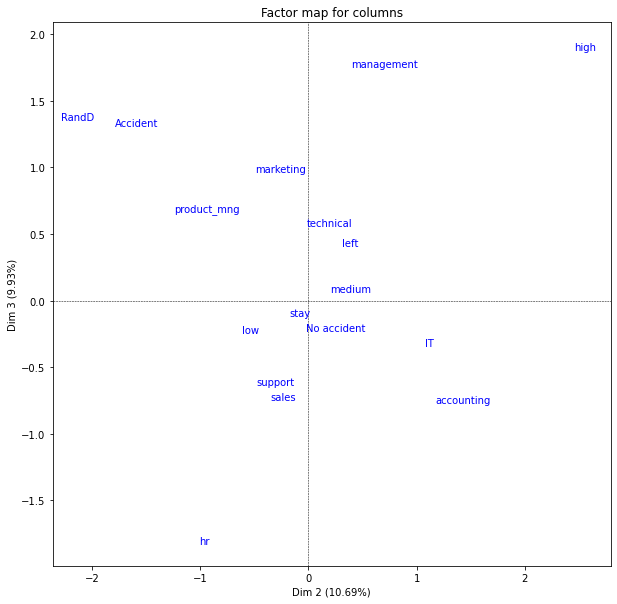

In [30]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=2, num_y_axis=3,figsize=(10,10))